In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file = "CrossingSmaIndicator/1641168000000-1644364800000-4h-history.csv"
df = pd.read_csv("../data/trading_history/" + file, low_memory=False)

In [3]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'EntryTime', 'EntryPrice',
       'Position', 'ExitPrice', 'ExitTime', 'MaxDrawDown', 'Variation',
       'Portfolio', 'SMA9', 'SMA21', 'dSMA9', 'ddSMA9', 'dSMA21', 'ddSMA21',
       'SMA9_under_SMA21_trigger'],
      dtype='object')

In [4]:
dsma_short_position_winning = df.dSMA9[(df.Variation > 0) & (df.Position == "SHORT")]
dsma_short_position_losing = df.dSMA9[(df.Variation <= 0) & (df.Position == "SHORT")]
dsma_long_position_winning = df.dSMA9[(df.Variation > 0) & (df.Position == "LONG")]
dsma_long_position_losing = df.dSMA9[(df.Variation <= 0) & (df.Position == "LONG")]

### Analysis of dSMA according to position 

Text(0.99, 0.99, 'Losing : \nmean: -8.227617283950613e-06\n std: 5.7576844766014535e-06')

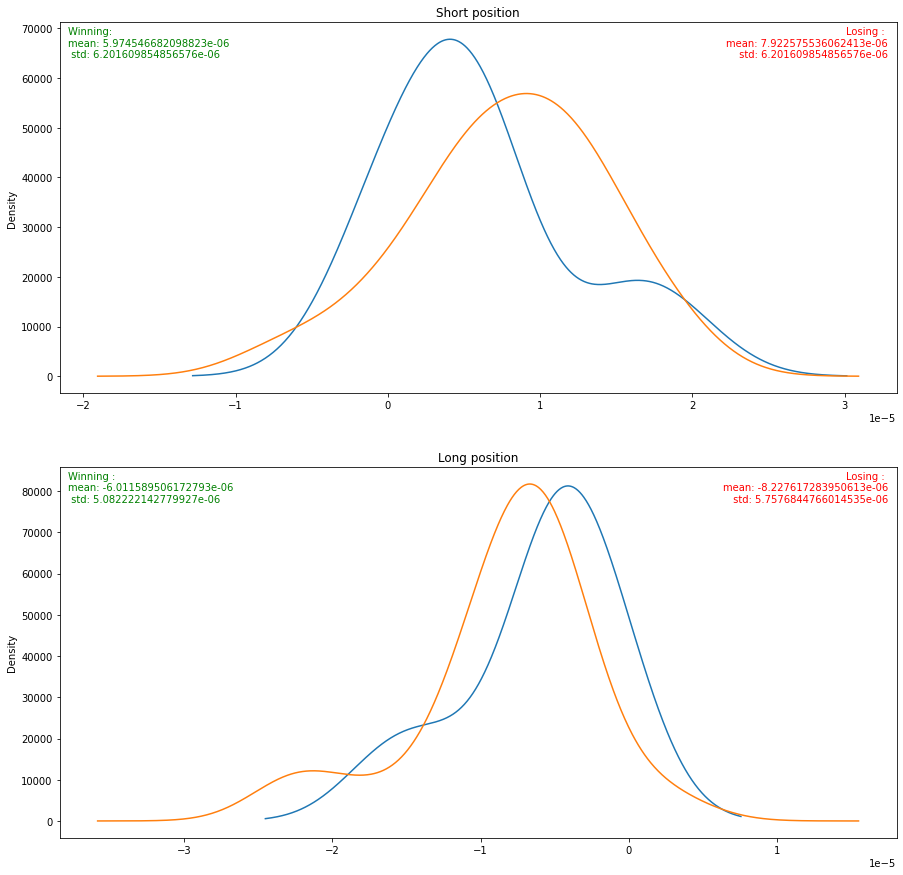

In [21]:
fig, axs = plt.subplots(2,1, figsize=(15, 15))
axs[0].title.set_text('Short position')
axs[1].title.set_text('Long position')


dsma_short_position_winning.plot(kind='kde', ax=axs[0])
axs[0].text(x=0.01,
            y=0.99,
            s=f"Winning: \nmean: {dsma_short_position_winning.mean()}\n std: {dsma_short_position_winning.std()}",
            color="green",
            ha='left', 
            va='top', 
            transform=axs[0].transAxes,
           )


dsma_short_position_losing.plot(kind='kde', ax=axs[0])
axs[0].text(x=0.99,
            y=0.99,
            s=f"Losing : \nmean: {dsma_short_position_losing.mean()}\n std: {dsma_short_position_winning.std()}",
            color="red",
            ha='right', 
            va='top', 
            transform=axs[0].transAxes,
            )


dsma_long_position_winning.plot(kind='kde', ax=axs[1])
axs[1].text(x=0.01,
            y=0.99, 
            s=f"Winning : \nmean: {dsma_long_position_winning.mean()}\n std: {dsma_long_position_winning.std()}",
            color="green",
            ha='left', 
            va='top', 
            transform=axs[1].transAxes,
            )


dsma_long_position_losing.plot(kind='kde', ax=axs[1])
axs[1].text(x=0.99,
            y=0.99, 
            s=f"Losing : \nmean: {dsma_long_position_losing.mean()}\n std: {dsma_long_position_losing.std()}",
            color="red",
            ha='right', 
            va='top', 
            transform=axs[1].transAxes,
           )
